# Demo

### Load and Preprocess Image

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
# from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

In [0]:
from keras.preprocessing import image
img = image.load_img('snake-224.jpg',target_size=(224,224))

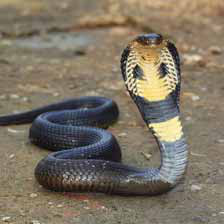

In [7]:
img

In [0]:
x = image.img_to_array(img)

In [14]:
x.shape

(224, 224, 3)

In [0]:
import numpy as np
x = np.expand_dims(x,axis=0)

In [16]:
x.shape

(1, 224, 224, 3)

### Load Model

In [17]:
model = VGG16()
# model = ResNet50()





553467904/553467096 [==============================] - 40s 0us/step








In [18]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Make prediction and decode

In [0]:
predictions = model.predict(x)

In [20]:
predictions

array([[7.95479269e-14, 3.56764043e-14, 7.12576038e-15, 2.38586210e-14,
        6.12542921e-14, 1.74862390e-13, 1.05245490e-13, 5.07207458e-16,
        1.87105936e-15, 1.01921325e-12, 4.43071712e-15, 5.80384053e-15,
        4.51231550e-16, 7.04206675e-16, 1.90424600e-16, 3.32217598e-16,
        3.20788868e-15, 9.23405038e-16, 1.82121494e-16, 1.73381673e-15,
        7.43081517e-16, 5.51779380e-13, 7.76633837e-15, 3.47023063e-14,
        1.26346981e-15, 3.18324360e-13, 4.66773599e-11, 3.41129387e-13,
        8.15478598e-13, 1.94996119e-13, 4.59112186e-14, 4.18775546e-15,
        8.93494805e-14, 7.16198802e-12, 1.78644621e-12, 1.84838459e-13,
        2.16049119e-12, 4.48207552e-14, 1.55826640e-09, 6.95536348e-13,
        1.13313859e-13, 2.76495129e-11, 5.96999750e-12, 6.06368688e-12,
        1.96442307e-09, 5.34208094e-11, 1.95464914e-13, 3.51192382e-12,
        1.20961297e-10, 2.71315088e-13, 8.80587581e-14, 4.29821469e-16,
        4.37029230e-05, 1.51647881e-04, 5.48462776e-05, 3.646137

In [21]:
classes = decode_predictions(predictions,top=3)

40960/35363 [==================================] - 0s 0us/step


In [22]:
classes

[[('n01748264', 'Indian_cobra', 0.9991972),
  ('n01751748', 'sea_snake', 0.00026633617),
  ('n01737021', 'water_snake', 0.00017376206)]]

# Transfer Learning

### Import the data

In [27]:
import keras

URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = keras.utils.get_file('cats_and_dogs_filtered.zip', origin=URL, extract=True)

68608000/68606236 [==============================] - 0s 0us/step


In [0]:
PATH = path_to_zip.replace('.zip', '')

In [0]:
train_dir = PATH + '/train'
validation_dir = PATH + '/validation'

### Step 1: Data Augmentation

In [0]:
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [38]:
BATCH_SIZE = 128

train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Step 2: Pre-Trained Base Model

In [39]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape = (IMG_WIDTH, IMG_HEIGHT, 3))

58892288/58889256 [==============================] - 5s 0us/step


In [40]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

### Step 3: Replace softmax Layer and add one dense layer

In [0]:
# x = base_model.output
# x = Flatten()(x)
# x = Dense(256, activation='relu')(x) #new FC layer, random init
# x = Dropout(0.4)(x)
# predictions = Dense(1, activation='sigmoid')(x)
# model = Model(inputs=base_model.input, outputs=predictions)

from keras.layers import Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Setup trainable layer
for layer in base_model.layers:
    layer.trainable = False

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


### Step 4: Train model

In [48]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [49]:
from tensorflow.keras.callbacks import EarlyStopping
history = model.fit_generator(
    train_data_gen,
    epochs=30,
    validation_data=val_data_gen,
    callbacks = [EarlyStopping(monitor='val_loss', patience=2, verbose=0, 
                               restore_best_weights = True)],
)



Epoch 1/30
16/16 [==============================] - 25s 2s/step - loss: 0.8813 - acc: 0.5826 - val_loss: 0.4880 - val_acc: 0.7550
Epoch 2/30
16/16 [==============================] - 16s 1s/step - loss: 0.5004 - acc: 0.7501 - val_loss: 0.3487 - val_acc: 0.8330
Epoch 3/30
16/16 [==============================] - 18s 1s/step - loss: 0.4354 - acc: 0.7966 - val_loss: 0.3400 - val_acc: 0.8420
Epoch 4/30
16/16 [==============================] - 18s 1s/step - loss: 0.4255 - acc: 0.7970 - val_loss: 0.2805 - val_acc: 0.8830
Epoch 5/30
16/16 [==============================] - 18s 1s/step - loss: 0.3847 - acc: 0.8245 - val_loss: 0.2727 - val_acc: 0.8830
Epoch 6/30
16/16 [==============================] - 18s 1s/step - loss: 0.3734 - acc: 0.8305 - val_loss: 0.2642 - val_acc: 0.8900
Epoch 7/30
16/16 [==============================] - 18s 1s/step - loss: 0.3790 - acc: 0.8295 - val_loss: 0.2593 - val_acc: 0.8900
Epoch 8/30
16/16 [==============================] - 18s 1s/step - loss: 0.3600 - acc: 0.

In [51]:
model.evaluate_generator(val_data_gen)

[0.248691113948822, 0.888000002861023]

In [0]:
preds = model.predict_generator(val_data_gen)

In [53]:
preds[:10]

array([[0.02951181],
       [0.03806376],
       [0.8598811 ],
       [0.9998669 ],
       [0.9998268 ],
       [0.9134021 ],
       [0.00780568],
       [0.00913218],
       [0.99910235],
       [0.01337558]], dtype=float32)

#### Test the Dog Image

57344/49553 [==================================] - 0s 0us/step


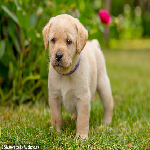

In [55]:
import numpy as np
import PIL.Image as Image

img = keras.utils.get_file('image1.jpg',
                            'https://i.dailymail.co.uk/1s/2019/11/23/09/21370544-7717313-image-a-1_1574501083030.jpg')
                            # 'https://images.all-free-download.com/images/graphicthumb/dogs_dog_animal_215598.jpg')
img = Image.open(img).resize((150,150))
img

In [56]:
img = np.array(img)/255
img.shape

(150, 150, 3)

In [57]:
img = np.expand_dims(img, axis=0)
img.shape

(1, 150, 150, 3)

In [58]:
result = model.predict(img)
result

array([[0.99999964]], dtype=float32)

In [59]:
round(result[0][0])

1.0

#### Test the Cat Image

65536/60717 [================================] - 0s 7us/step


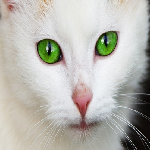

In [62]:
import numpy as np
import PIL.Image as Image

img = keras.utils.get_file('image10.jpg',
                              # 'https://www.thesprucepets.com/thmb/wd4VS5A5UCHLF0IBG-DsVfrLypk=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/horse-galloping-in-grass-688899769-587673275f9b584db3a44cdf.jpg')
                              'https://images.all-free-download.com/images/graphicthumb/cat_with_green_eyes_194623.jpg')
img = Image.open(img).resize((150,150))
img

In [0]:
img = np.array(img) / 255
img = np.expand_dims(img, axis=0)

In [64]:
result = model.predict(img)
round(result[0][0])

0.0